In [3]:
import numpy as np
import seaborn as sns

In [2]:
dados = np.array([
    126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
    140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
    147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
    150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
    154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
    157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
    161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
    164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
    168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
    171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
    178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. , 192.5
])

<AxesSubplot:ylabel='Count'>

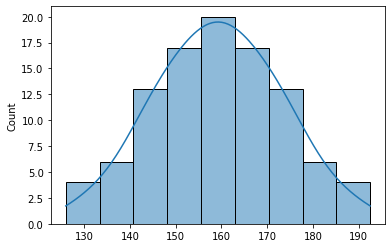

In [4]:
sns.histplot(dados, kde=True)

In [5]:
media = np.mean(dados)
desvio_padrao = np.std(dados)
media, desvio_padrao

(159.25, 13.65)

In [7]:
np.quantile(dados, [0.25,0.5,0.75])

array([150.5 , 159.25, 168.  ])

### Probabilidade de selecionar uma pessoa no Q1

In [8]:
# z-score
(150.5 - media)/desvio_padrao

-0.641025641025641

In [18]:
0.26109

0.26109

Como pode ser observado na tabela Z:
* 0.26109 é a probabilidade de selecionar qualquer pessoa antes do primeiro quartil.

### Probabilidade de selecionar uma pessoa no Q3

In [11]:
# z-score
(168. - media)/desvio_padrao

0.641025641025641

In [17]:
0.73891, 1-0.73891

(0.73891, 0.26109000000000004)

Como pode ser observado na tabela Z:
* 0.73891 é a probabilidade de selecionar qualquer pessoa antes do terceiro quartil.
* 0.26109 é a probabilidade de selecionar qualquer pessoa depois do terceiro quartil.

### Probabilidade de selecionar uma pessoa entre Q2 e Q3

In [15]:
(159.25-media)/desvio_padrao

0.0

In [19]:
0.5

0.5

Como pode ser observado na tabela Z:
* 0.5 é a pobabilidade de selecionar uma pessoa a direita ou a esquerda do segundo quartil.
* O fato é que o segundo quartil corresponde extamente a média.

In [21]:
0.73891-0.5

0.23890999999999996

Pela subtração, 0.23891 é a pobabilidade de selecionar uma pessoa entre o segundo e o terceiro quartil.

### Probabilidade de selecionar uma pessoa em Q1 e Q3

In [23]:
0.26109+0.26109

0.52218

Pela soma, 0.52218 é a pobabilidade de selecionar uma pessoa no primeiro e no terceiro quartil.

### Probabilidade de não selecionar uma pessoa em Q1 e Q3

In [24]:
1-0.52218

0.47782

Pela subtração, 0.47782 é a pobabilidade de não selecionar uma pessoa no primeiro e no terceiro quartil.

## Bibliotecas (Scipy)

In [25]:
from scipy import stats

In [27]:
media = np.mean(dados)
desvio_padrao = np.std(dados)
media, desvio_padrao, np.quantile(dados, [0.25,0.5,0.75])

(159.25, 13.65, array([150.5 , 159.25, 168.  ]))

In [28]:
# Probabilidade de selecionar uma pessoa no Q1.
stats.norm.cdf(150.5, media, desvio_padrao)

0.26075301195608336

In [30]:
# Probabilidade de selecionar uma pessoa até o Q3.
stats.norm.cdf(168, media, desvio_padrao)

0.7392469880439166

In [31]:
# Probabilidade de selecionar uma pessoa depois do Q3.
stats.norm.sf(168, media, desvio_padrao)

0.26075301195608336

In [33]:
# Probabilidade de selecionar uma pessoa entre Q2 e Q3.
q2 = stats.norm.cdf(159.25, media, desvio_padrao)
q3 = stats.norm.cdf(168, media, desvio_padrao)
q3-q2

0.23924698804391664